# Bizzarrie e paradossi nella scienza delle reti

In questo notebook vedremo due "bizzarrie" delle reti: il fenomeno del **piccolo mondo** e il paradosso dell'amicizia, ossia il fatto che _i nostri amici hanno più amici di noi_.

In [3]:
library(igraph)
igraph_options(vertex.frame.color = "white", vertex.frame.size = 1)

## Il fenomeno _small-world_

Qualche riferimento:

* esperimento del piccolo mondo di S. Milgram (1968-1970) e i sei gradi di separazione
* Il modello di Duncan J. Watts e Steven Strogatz (1998)

Abbiamo bisogno di qualche definizione:

#### Lunghezza media di un cammino

Sia $G = (V, E)$ un grafo/

* Cammino $(v_0, v_1, \dots, v_n)$ dove $v_i \in V$ per ogni $i = 0, \dots, n$ e $v_i$ è connesso (è adiacente) a $v_{i+1}$. (NB: in realtà chiediamo che non ci siano ripetizioni dello stesso nodo in questa successione. Perché?)
* La lunghezza del cammino $(v_0, v_1, \dots, v_n)$ è $n$.

Per trovare la lunghezza media di una cammino nel grafo $G$ troviamo tutti i cammini, calcoliamo la loro lunghezza e poi facciamo la media artitmetica.

In [5]:
library(igraphdata)
data(package = "igraphdata")

In [6]:
data(USairports)
summary(USairports)

IGRAPH bf6202d DN-- 755 23473 -- US airports
+ attr: name (g/c), name (v/c), City (v/c), Position (v/c), Carrier
| (e/c), Departures (e/n), Seats (e/n), Passengers (e/n), Aircraft
| (e/n), Distance (e/n)


Vediamo alcune proprietà di questa rete e se in questa rete di aeroporti possiamo vedere il fenomeno _small-world_.

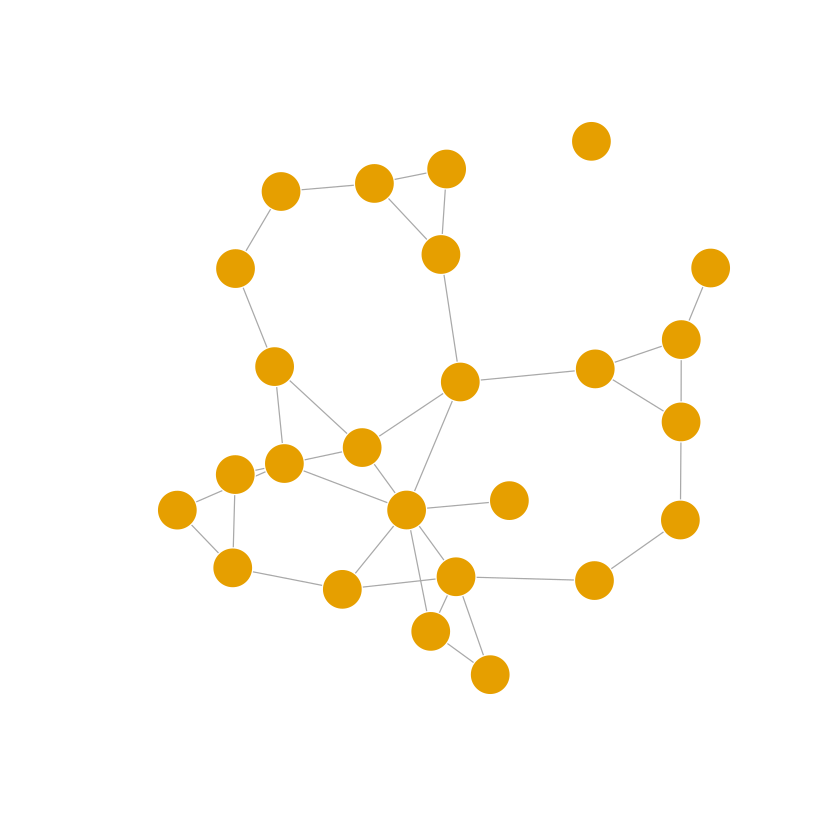

In [25]:
er <- sample_gnp(n = 25, p = .1)
plot(er, vertex.label = NA)

In [27]:
mean_distance(er)

[1] 3.119565

In [28]:
transitivity(er, type = "average")

[1] 0.1863636

### Il modello Watts-Strogatz

Due ingredienti principali: presenza di raggruppamenti di nodi in sotto-reti ben connesse e, ovviamente, cammini con lunghezza media bassa.

Vediamo di ri-costruire il modello.

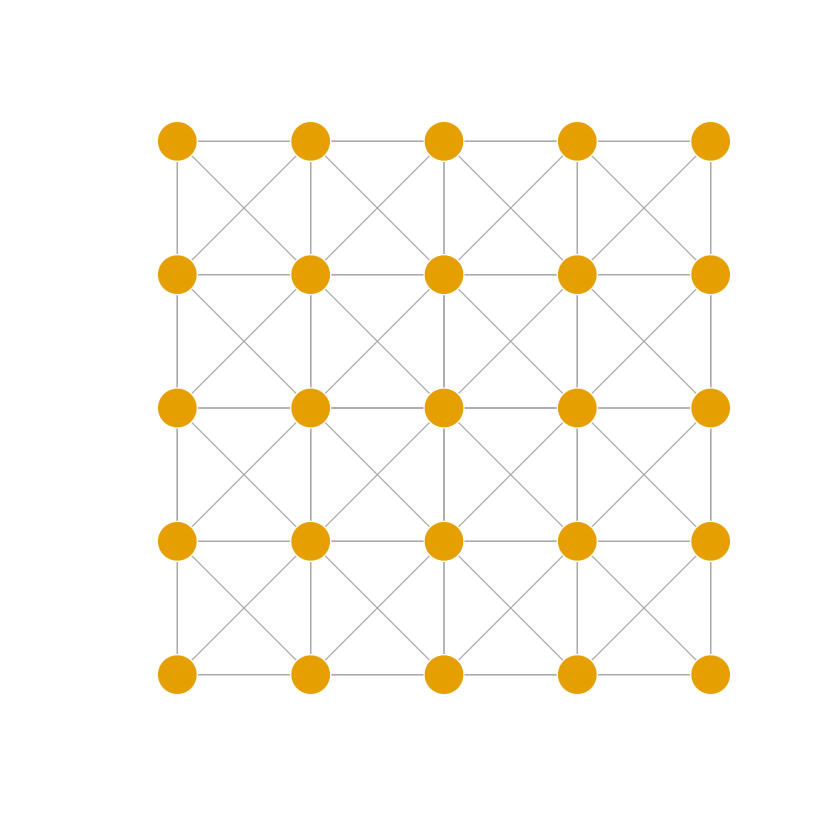

In [21]:
g <- make_lattice(length = 5, dim = 2, nei = 2) 
g |> plot(vertex.label = NA, layout = layout_on_grid)

In [22]:
mean_distance(g)
transitivity(g, type="average")

[1] 1.926667

[1] 0.5778701

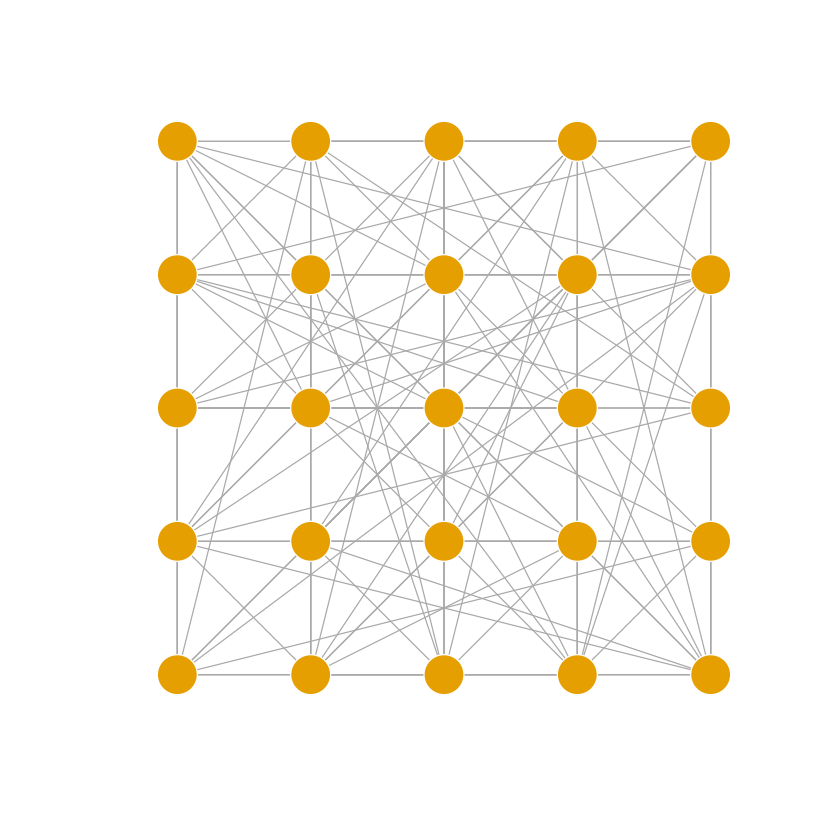

In [23]:
sw <- sample_smallworld(dim = 2, size = 5, nei = 2, p = .1)
plot(sw, vertex.label = NA, layout = layout_on_grid)

In [20]:
mean_distance(sw)
transitivity(sw, type = "average")

[1] 1.5

[1] 0.5432634

## Il paradosso dell'amicizia

Il problema arriva, di nuovo, dalla sociologia: 1991, Scott L. Feld [eld, Scott L. (1991), "Why your friends have more friends than you do", American Journal of Sociology, 96 (6): 1464–1477](doi.org/10.1086/229693).

... Matematicamente...

1. Astrazione

Assumiamo che:

* (i) la rete degli amici sia rappresentata da un grafo non diretto $G = (V, E)$
* il numero medio di amici di una persona (nodo nel grafo) è quindi il grado medio della rete

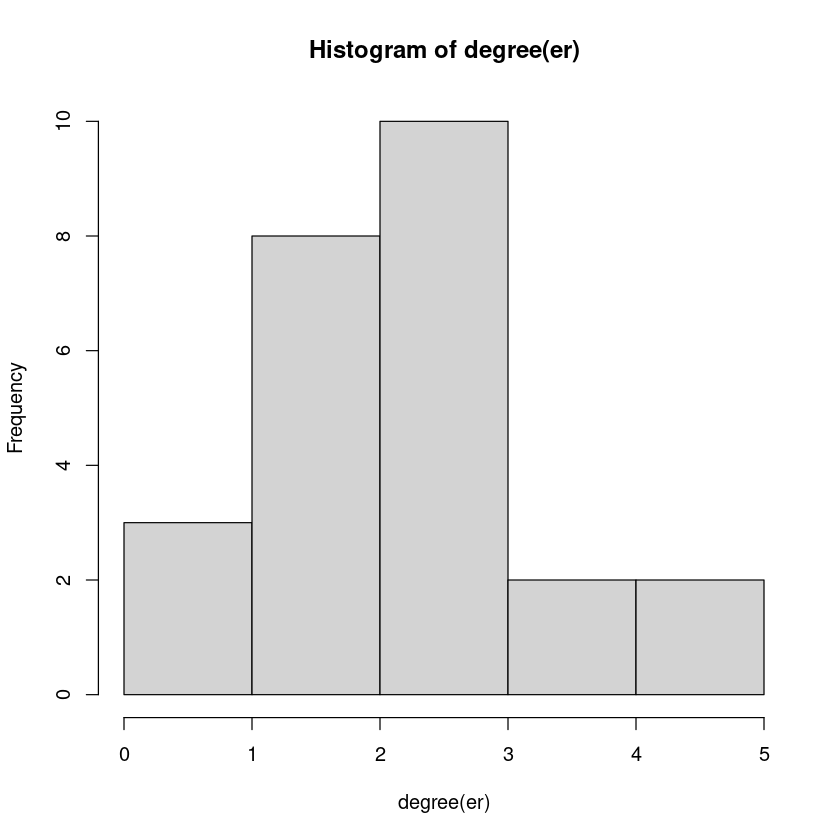

In [39]:
degree(er) |> hist()

Chiamiamo $m = |E|$ il numero di link nella rete $G$. Tagliamoli: ci saranno $2m$ mezzi-archi.

Scegliamo un semi-arco e vediamo dove ci porta:

* a un nodo di grado 0 (un nodo isolato)
* a un nodo di grado $k \neq 0$

Se un nodo ha $k$ possiede semi-link, qual è la probabilità che il semi-link che sto seguendo mi porti a questo nodo? $\frac{k}{2m - 1}$.

Quanti sono i nodi della rete che hanno grado $k$? $p(k) \cdot N$.

Qual è la probabilità che il mio semi-arco sia connesso ad un qualsiasi nodo di grado $k$? $\frac{k p(k)}{\sum_k k p(k)}$.

Quindi andiamo a vedere il paradosso: